# 0816050 施雅青

In [2]:
import pandas as pd
import jieba.posseg as pseg
attribute_m = ['title','label']
df = pd.read_csv('data.csv',names=attribute_m)

In [3]:
df

,title,label
0,除了量子電腦，Google 一口氣推洪水預警、語言障礙 App 與乳癌檢測 AI,AI
1,TTD Q3 財報亮眼，受惠業務量擴大，營收年增率達 39%,AI
2,Google 新雄心：用 DeepMind AI 成立新公司，為人類打造新藥謀福祉！,AI
3,「愚蠢！」首位被超級電腦打敗的前世界棋王對 Meta 移除人臉辨識措施表達不滿,AI
4,【Howie 商業投資】兵臨城下，誰是東南亞 AI 新創最大的投資者？,AI
...,...,...
2887,自以為「有創意」就夠了嗎？勸退想要進入行銷產業的新鮮人,marketing
2888,IT、R&D、MKT、PR是什麼意思？一次學會公司各部門英文簡稱,marketing
2889,飲料抽獎的魔力：下次不要再被「第二件0元」的活動給誘拐啦！,marketing
2890,《店家必學！活用「Google我的商家」》：利用「Google街景」與其他商家拉開差距,marketing


## Statistical Computing and Data Visualization

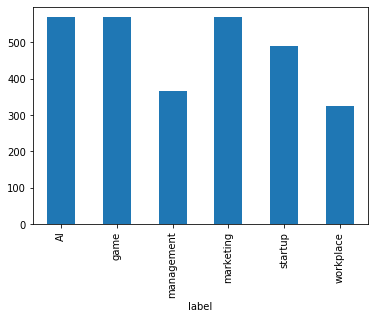

In [23]:
# import 
groups = df.groupby('label')
groups.size().plot(kind='bar')

## Data Preprocessing

In [5]:
def jieba_tokenizer(text):
    words = pseg.cut(text)
    return ' '.join([ 
        word for word, flag in words if flag != 'x'])

In [6]:
df['Title Tokenized'] = df['title'].apply(jieba_tokenizer)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\acer\AppData\Local\Temp\jieba.cache
Loading model cost 2.035 seconds.
Prefix dict has been built successfully.


In [7]:
df=df.sample(frac=1).reset_index(drop=True)

In [8]:
df

,title,label,Title Tokenized
0,磁鐵改叫「我沒吸引力了」、坐臥兩用床改叫「我爸媽會打呼」⋯⋯Ikea 妙玩 SEO ！,marketing,磁鐵 改叫 我 沒 吸引力 了 坐臥 兩 用床 改叫 我 爸媽 會 打呼 Ikea 妙 玩 SEO
1,【硬塞書摘】就業的終結－你知道就業機會正在減少嗎？,workplace,硬 塞 書 摘 就業 的 終結 你 知道 就業 機會 正在 減少 嗎
2,疫情下的募資，新創最該留意的事情,startup,疫情 下 的 募資 新創 最 該 留意 的 事情
3,【Martech Asia】行銷科技之父 Scott Brinker：去程式化的行銷應用 這...,AI,Martech Asia 行銷 科技 之 父 Scott Brinker 去 程式化 的 行...
4,傳微軟有意以 100 億美元收購 Discord 高價出手背後誘因為何？,game,傳 微軟 有意 以 100 億 美元 收購 Discord 高價 出手 背 後 誘 因為 何
...,...,...,...
2887,Google 內部戰男女！大刀維護多元方針，執行長開除了發表性別偏見千言書的員工,management,Google 內部 戰 男女 大刀 維護 多元 方針 執行 長開 除了 發表 性別 偏 見 ...
2888,中共電動禁令就像是「虎門銷煙」——真正的問題，從來都不是鴉片,game,中共 電動 禁令 就 像是 虎門 銷煙 真正 的 問題 從來 都 不是 鴉片
2889,YouTube與Instagram推出「短影片」功能，有機會挑戰TikTok的地位嗎？,marketing,YouTube 與 Instagram 推出 短 影片 功能 有 機會 挑戰 TikTok ...
2890,用 4 個直白問題，摸清一位 CEO,startup,用 個 直白 問題 摸清 一位 CEO


In [43]:
total_words = ' '.join(df['Title Tokenized'])
vectorterms = list(set(total_words))
# print(vectorterms)

In [10]:
import numpy as np
def vectorize(words):
    self_main_list = [0] * len(vectorterms)
    for term in words:
        if term in vectorterms:  # 因為測試資料集當中的詞不一定有出現在訓練資料集中
            idx = vectorterms.index(term)
            self_main_list[idx] += 1
    return np.array(self_main_list)

# Tokenized後的文章標題做向量化
X = np.concatenate(df['Title Tokenized'].apply(vectorize).values).reshape(-1, len(vectorterms))


In [11]:
y = df['label']
print(np.unique(y))
y_label = np.array(y)

['AI' 'game' 'management' 'marketing' 'startup' 'workplace']


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y_label, test_size=0.3, random_state=42)
# print(X_train.shape)
# print(Y_train.shape)
# print(X_test.shape)
# print(Y_test.shape)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

##  Building Models

              precision    recall  f1-score   support

          AI       0.87      0.85      0.86       167
        game       0.86      0.81      0.83       173
  management       0.82      0.79      0.81       110
   marketing       0.73      0.79      0.76       177
     startup       0.75      0.82      0.78       146
   workplace       0.92      0.83      0.87        95

    accuracy                           0.81       868
   macro avg       0.83      0.81      0.82       868
weighted avg       0.82      0.81      0.82       868

[[142   1   0  15   8   1]
 [  8 140   1  18   5   1]
 [  4   1  87   6  12   0]
 [  4  14   5 140  11   3]
 [  3   5   8   9 119   2]
 [  2   2   5   3   4  79]]


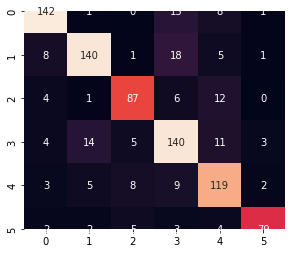

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
print(classification_report(Y_test, y_pred))
print(confusion_matrix)
sns.heatmap(confusion_matrix, square= True, annot=True, cbar=False, fmt ='.0f')

              precision    recall  f1-score   support

          AI       0.88      0.95      0.91       167
        game       0.90      0.87      0.88       173
  management       0.83      0.78      0.81       110
   marketing       0.87      0.87      0.87       177
     startup       0.83      0.88      0.85       146
   workplace       0.94      0.84      0.89        95

    accuracy                           0.87       868
   macro avg       0.88      0.87      0.87       868
weighted avg       0.87      0.87      0.87       868

[[159   0   1   4   3   0]
 [  8 150   0  11   3   1]
 [  4   1  86   3  13   3]
 [  5   9   4 154   4   1]
 [  4   4   8   1 129   0]
 [  1   2   4   4   4  80]]


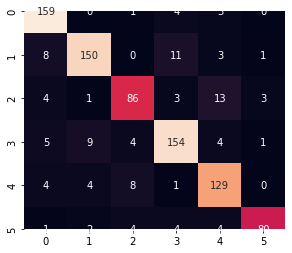

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
print(classification_report(Y_test, y_pred))
print(confusion_matrix)
sns.heatmap(confusion_matrix, square= True, annot=True, cbar=False, fmt ='.0f')

              precision    recall  f1-score   support

          AI       0.85      0.56      0.67       167
        game       0.72      0.51      0.60       173
  management       0.50      0.51      0.50       110
   marketing       0.61      0.62      0.61       177
     startup       0.44      0.55      0.49       146
   workplace       0.34      0.59      0.43        95

    accuracy                           0.56       868
   macro avg       0.58      0.56      0.55       868
weighted avg       0.61      0.56      0.57       868

[[ 93   6   9  12  21  26]
 [  5  89  11  20  20  28]
 [  4   7  56   7  24  12]
 [  3  15   8 109  19  23]
 [  3   6  19  18  80  20]
 [  1   0   9  12  17  56]]


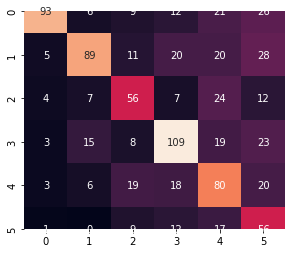

In [41]:
clf = KNeighborsClassifier(n_neighbors=100)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
print(classification_report(Y_test, y_pred))
print(confusion_matrix)
sns.heatmap(confusion_matrix, square= True, annot=True, cbar=False, fmt ='.0f')

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
newX = pca.fit_transform(X)

In [20]:
print(newX.shape)

(2892, 25)


In [21]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(newX, y_label, test_size=0.3, random_state=42)
print(X_train_pca.shape)

(2024, 25)


              precision    recall  f1-score   support

          AI       0.75      0.74      0.74       167
        game       0.59      0.67      0.63       173
  management       0.55      0.21      0.30       110
   marketing       0.61      0.60      0.60       177
     startup       0.63      0.59      0.61       146
   workplace       0.35      0.58      0.44        95

    accuracy                           0.59       868
   macro avg       0.58      0.56      0.56       868
weighted avg       0.60      0.59      0.58       868

[[124  14   1   7   6  15]
 [ 16 116   4  16   6  15]
 [  6  16  23  16  21  28]
 [  9  26   2 106  10  24]
 [  8  13  10  11  86  18]
 [  3  10   2  18   7  55]]


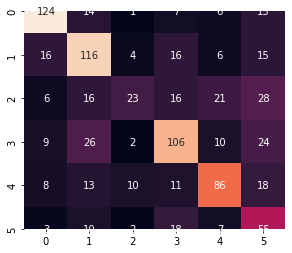

In [42]:
clf = KNeighborsClassifier(n_neighbors=100)
clf.fit(X_train_pca, Y_train_pca)
y_pred_pca = clf.predict(X_test_pca)
confusion_matrix = metrics.confusion_matrix(Y_test_pca, y_pred_pca)
print(classification_report(Y_test_pca, y_pred_pca))
print(confusion_matrix)
sns.heatmap(confusion_matrix, square= True, annot=True, cbar=False, fmt ='.0f')

## Save model & dictionary

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
# confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

          AI       0.92      0.95      0.93       167
        game       0.89      0.88      0.89       173
  management       0.86      0.75      0.80       110
   marketing       0.84      0.87      0.85       177
     startup       0.81      0.88      0.84       146
   workplace       0.91      0.84      0.87        95

    accuracy                           0.87       868
   macro avg       0.87      0.86      0.87       868
weighted avg       0.87      0.87      0.87       868



In [46]:
import joblib
joblib.dump(clf, 'RF_model')

['RF_model']

In [47]:
# test the checkpoint
loaded_model = joblib.load('RF_model')
y_pred = loaded_model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

          AI       0.92      0.95      0.93       167
        game       0.89      0.88      0.89       173
  management       0.86      0.75      0.80       110
   marketing       0.84      0.87      0.85       177
     startup       0.81      0.88      0.84       146
   workplace       0.91      0.84      0.87        95

    accuracy                           0.87       868
   macro avg       0.87      0.86      0.87       868
weighted avg       0.87      0.87      0.87       868



In [55]:
import csv
# with open('dictionary.csv', 'w', newline='') as file:
# #     writer = csv.writer(file, quoting=csv.QUOTE_ALL,delimiter=';')
#     writer.writerows(vectorterms)
with open('dictionary.csv', 'w',encoding="utf-8") as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(vectorterms)